Plotting the mixed state presentation of beliefs for hidden markov models

In [15]:
import torch as t
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the belief states
beliefs = t.load("data/beliefs_RRXOR_10000.pt")
print(f"Beliefs shape: {beliefs.shape}")
print(f"First few beliefs:\n{beliefs[:5]}")

Beliefs shape: torch.Size([10000, 1, 5])
First few beliefs:
tensor([[[0.4000, 0.0000, 0.2000, 0.2000, 0.2000]],

        [[0.4000, 0.0000, 0.2000, 0.4000, 0.0000]],

        [[0.0000, 0.5000, 0.0000, 0.0000, 0.5000]],

        [[0.6667, 0.0000, 0.3333, 0.0000, 0.0000]],

        [[0.5000, 0.0000, 0.0000, 0.5000, 0.0000]]])


In [26]:
# Define equilateral triangle vertices for 3-simplex
def get_triangle_coords():
    """Returns vertices of equilateral triangle for 3-simplex visualization"""
    # Standard equilateral triangle with vertices at:
    # Top: (0, sqrt(3)/2)
    # Bottom left: (-0.5, 0) 
    # Bottom right: (0.5, 0)
    vertices = np.array([
        [0, np.sqrt(3)/2],      # vertex 0 (top)
        [-0.5, 0],              # vertex 1 (bottom left)  
        [0.5, 0]                # vertex 2 (bottom right)
    ])
    return vertices

def simplex_to_triangle(probabilities):
    """Convert 3D probability simplex to 2D triangle coordinates"""
    print(probabilities.shape)
    if probabilities.shape[1] > 3:
        probabilities = probabilities[:, :3]
    vertices = get_triangle_coords()
    # Each point is weighted combination of vertices
    coords = probabilities @ vertices
    return coords

# Convert beliefs to triangle coordinates
triangle_coords = simplex_to_triangle(beliefs.squeeze().numpy())
print(f"Triangle coordinates shape: {triangle_coords.shape}")
print(f"First few coordinates:\n{triangle_coords[:5]}")

(10000, 5)
Triangle coordinates shape: (10000, 2)
First few coordinates:
[[ 0.1         0.34641017]
 [ 0.1         0.34641017]
 [-0.25        0.        ]
 [ 0.16666667  0.57735029]
 [ 0.          0.4330127 ]]


RGB color range: min=0.000, max=1.000


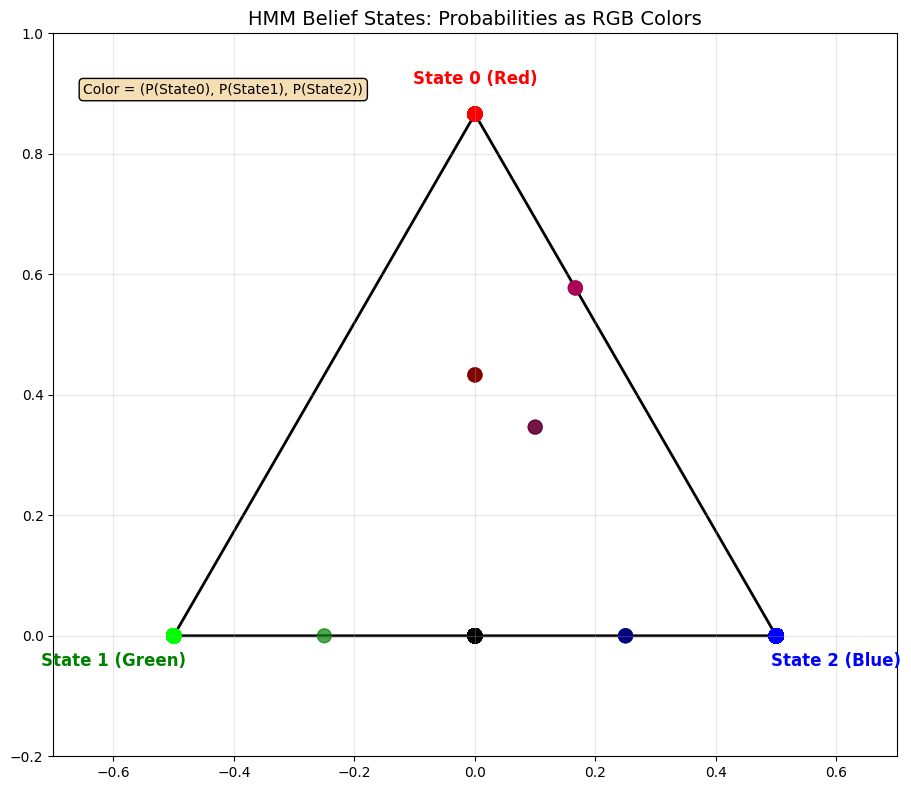

In [29]:
# Create color-coded simplex plot using probabilities as RGB
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Draw triangle outline
vertices = get_triangle_coords()
triangle = plt.Polygon(vertices, fill=False, edgecolor='black', linewidth=2)
ax.add_patch(triangle)

# Use probabilities as RGB colors (they're already normalized to sum to 1)

rgb_colors = beliefs.squeeze()[:, :3].numpy()
print(f"RGB color range: min={rgb_colors.min():.3f}, max={rgb_colors.max():.3f}")

scatter = ax.scatter(triangle_coords[:, 0], triangle_coords[:, 1], 
                    c=rgb_colors, alpha=0.7, s=100)

# Label vertices with color coding explanation
ax.text(vertices[0, 0], vertices[0, 1] + 0.05, 'State 0 (Red)', ha='center', fontsize=12, fontweight='bold', color='red')
ax.text(vertices[1, 0] - 0.1, vertices[1, 1] - 0.05, 'State 1 (Green)', ha='center', fontsize=12, fontweight='bold', color='green')
ax.text(vertices[2, 0] + 0.1, vertices[2, 1] - 0.05, 'State 2 (Blue)', ha='center', fontsize=12, fontweight='bold', color='blue')

ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.2, 1.0)
ax.set_aspect('equal')
ax.set_title('HMM Belief States: Probabilities as RGB Colors', fontsize=14)
ax.grid(True, alpha=0.3)

# Add explanation
ax.text(-0.65, 0.9, 'Color = (P(State0), P(State1), P(State2))', 
        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat"))

plt.tight_layout()
plt.show()

In [2]:
from transformer_lens import HookedTransformer
import torch as t
import matplotlib.pyplot as plt
import numpy as np
import os

device = "cuda" if t.cuda.is_available() else "cpu"
model = HookedTransformer.from_pretrained("gpt2-small", device=device)


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Loaded pretrained model gpt2-small into HookedTransformer


In [ ]:
prompt = "Hello, how are you?"
logits, cache = model.run_with_cache(prompt)

New process: try loading the data

FileNotFoundError: [Errno 2] No such file or directory: 'data/filter_positions/position_filter_mask_job.pkl'